In [1]:
import torch.nn as nn
import torch
from torchvision import models
from datasets.linemod.dataset import DepthDataset
import torch
import os
import torch.nn.functional as F
from lib.loss_depth import LogL2, GradientLoss, NormalLoss
from torch import optim
import numpy as np
import time
import matplotlib.pyplot as plt
from lib.utils import setup_logger, im_convert, depth_to_img
from lib.network import DepthV2
from lib.utils import visualize
from lib.fill_depth_colorization import fill_depth_colorization
from PIL import Image
import png
from torchvision import transforms

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore") 

In [2]:
mode = 'test'
root = "./datasets/linemod/Linemod_preprocessed"

./datasets/linemod/Linemod_preprocessed/data/09/
./datasets/linemod/Linemod_preprocessed/data/09/depth/0010.png ./datasets/linemod/Linemod_preprocessed/data/09/depth_filled/0010


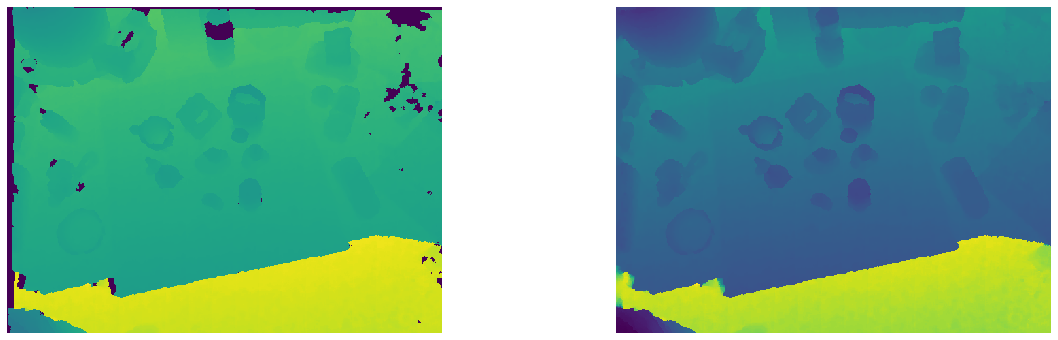

./datasets/linemod/Linemod_preprocessed/data/09/depth/0021.png ./datasets/linemod/Linemod_preprocessed/data/09/depth_filled/0021
1.8867924528301887 %


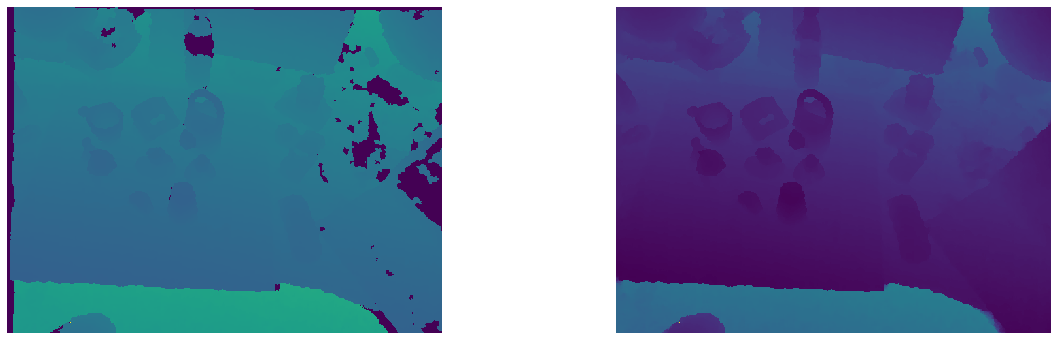

./datasets/linemod/Linemod_preprocessed/data/09/depth/0032.png ./datasets/linemod/Linemod_preprocessed/data/09/depth_filled/0032


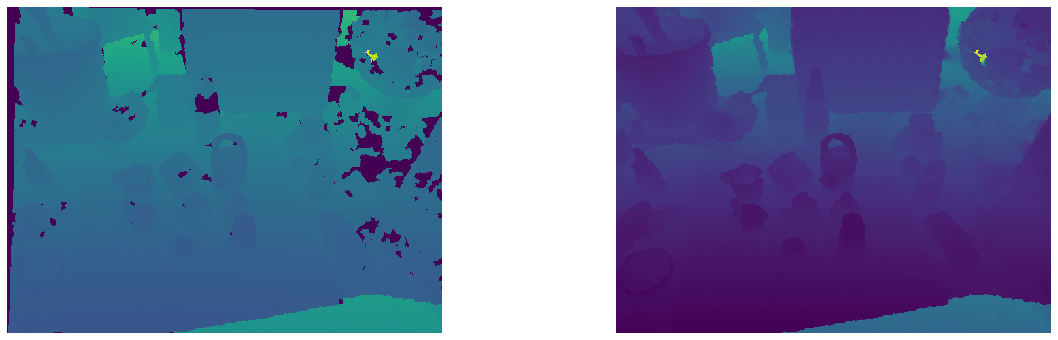

./datasets/linemod/Linemod_preprocessed/data/09/depth/0042.png ./datasets/linemod/Linemod_preprocessed/data/09/depth_filled/0042
3.7735849056603774 %


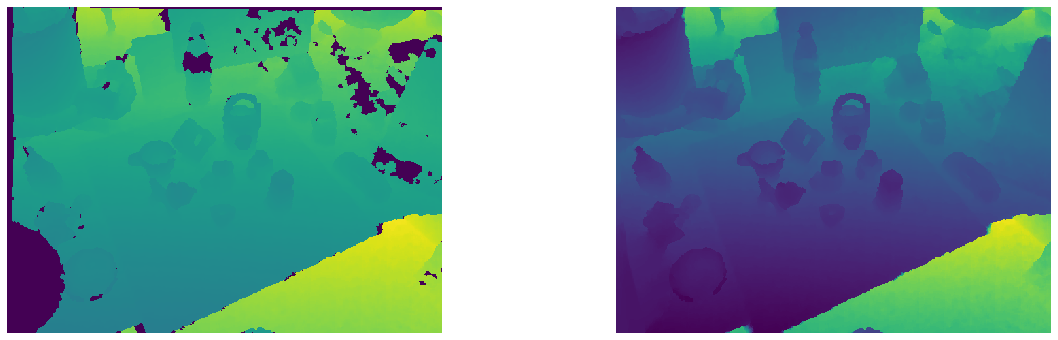

./datasets/linemod/Linemod_preprocessed/data/09/depth/0053.png ./datasets/linemod/Linemod_preprocessed/data/09/depth_filled/0053


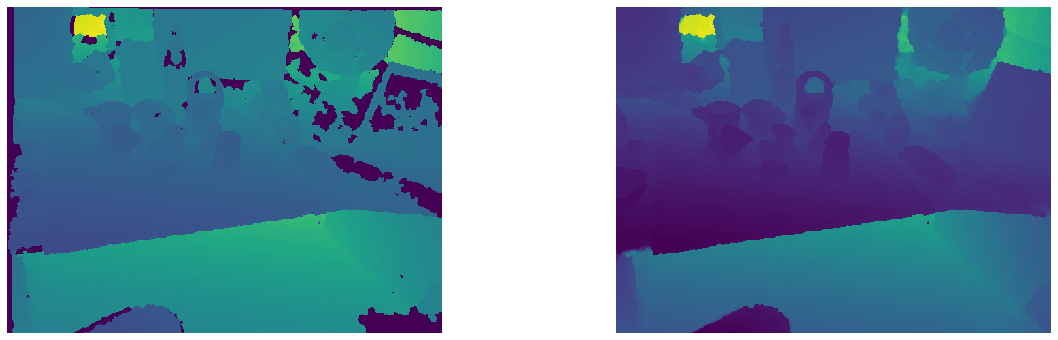

KeyboardInterrupt: 

In [7]:
objlist = [9, 12, 13, 14, 15]
item_count = 0

for item in objlist:
    files = []
    count = 0
    input_file = open('{0}/data/{1}/{2}.txt'.format(root, '%02d' % item, mode))
    while 1:
        item_count += 1
        input_line = input_file.readline()
        if mode == 'test' and item_count % 10 != 0:
            continue
        if not input_line:
            break
        if input_line[-1:] == '\n':
            input_line = input_line[:-1]
        files.append(input_line) 

    folder_obj = '{0}/data/{1}/'.format(root, '%02d' % item)
    print(folder_obj)
    base_depth_path = folder_obj + 'depth'
    base_filled_path = folder_obj + 'depth_filled'
    base_rgb_path = folder_obj + 'rgb'
    #     os.mkdir(filled_path)

    for file_name in files:
        depth_path = base_depth_path + '/' + file_name + '.png'
        rgb_img_path = base_rgb_path + '/' + file_name + '.png'
        filled_depth_path = base_filled_path + '/' + file_name

        depth = np.array(Image.open(depth_path))
        rgb = np.array(Image.open(rgb_img_path).convert('RGB'))

        output_depth = fill_depth_colorization(rgb, depth, 1)

        np.save(filled_depth_path, output_depth)
        print(depth_path, filled_depth_path)
        count += 1
        if count % 2 == 0:
            print(count * 100 / len(files), "%")

        if count % 50 == 0:

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
            max_d = np.max(depth)
            min_d = np.min(depth)
            depth_norm = (depth - min_d) * 255 / (max_d - min_d)

            ax1.imshow(depth_norm)
            ax1.axis("off")

            max_d = np.max(output_depth)
            min_d = np.min(output_depth)
            depth_norm = (output_depth - min_d) * 255 / (max_d - min_d)
            ax2.imshow(depth_norm)
            ax2.axis("off")

            plt.show()


In [10]:
len(files)

18